# Assignment 6: Apply NB

<ol>
    <li>Minimum data points need to be considered for people having 4GB RAM is <strong>50k</strong> and for 8GB RAM is <strong>100k</strong></li>
    <li>When you are using ramdomsearchcv or gridsearchcv you need not split the data into X_train,X_cv,X_test. As the above methods use kfold. The model will learn better if train data is more so splitting to X_train,X_test will suffice.</li>
    <li>If you are writing for loops to tune your model then you need split the data into X_train,X_cv,X_test.</li>
    <li>While splitting the data explore stratify parameter. </li>
    <li><strong>Apply Multinomial NB on these feature sets</strong></li>
        <ul>
            <li>Features that need to be considered</li> 
                <dl>
                  <dt>essay</dt>
                    <dd>while encoding essay, try to experiment with the max_features and n_grams parameter of vectorizers and see if it increases AUC score.</dd>
                  <dt>categorical features</dt>
                  <dd> - teacher_prefix</dd>
                  <dd> - project_grade_category</dd>
                  <dd> - school_state</dd>
                  <dd> - clean_categories</dd>
                  <dd> - clean_subcategories</dd>
                  <dt>numerical features</dt>
                  <dd> - price</dd>
                  <dd> - teacher_number_of_previously_posted_projects</dd>
                  <dd>while encoding the numerical features check <a href='https://imgur.com/ldZA1zg'>this</a> and <a href='https://ac-classroom-production.s3.amazonaws.com/public/COMMENT/Annotation_2020-05-21_225912_0lyZzN8.jpg'>this</a></dd>
                </dl>    
            <li><font color='red'>Set 1</font>: categorical, numerical features + preprocessed_eassay (BOW)</li>
            <li><font color='red'>Set 2</font>: categorical, numerical features + preprocessed_eassay (TFIDF)</li>
        </ul>
    <li><strong>The hyper paramter tuning(find best alpha:smoothing parameter)</strong>
        <ul>
    <li>Consider alpha values in range: 10^-5 to 10^2 like [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]</li>
    <li>Explore class_prior = [0.5, 0.5] parameter which can be present in MultinomialNB function(go through <a href='https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html'>this</a> ) then check how results might change.
    <li>Find the best hyper parameter which will give the maximum <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/receiver-operating-characteristic-curve-roc-curve-and-auc-1/'>AUC</a> value</li>
    <li>For hyper parameter tuning using k-fold cross validation(use GridsearchCV or RandomsearchCV)/simple cross validation data (write for loop to iterate over hyper parameter values)</li>
    <li>You need to plot the performance of model both on train data and cross validation data for each hyper parameter, like shown in the figure
    <img src='https://i.imgur.com/hUv6aEy.jpg' width=300px><dd>-while plotting take log(alpha) on your X-axis so that it will be more readable</dd></li>
    <li>Once after you found the best hyper parameter, you need to train your model with it, and find the AUC on test data and plot the ROC curve on both train and test.
    <img src='https://imgur.com/q2P65L5.jpg' width=300px></li>
    <li>Along with plotting ROC curve, you need to print the <a href='https://www.appliedaicourse.com/course/applied-ai-course-online/lessons/confusion-matrix-tpr-fpr-fnr-tnr-1/'>confusion matrix</a> with predicted and original labels of test data points
        <img src='https://i.imgur.com/IdN5Ctv.png' width=300px><dd>-plot the confusion matrix in heatmaps, while plotting the confusion matrix go through the <a href='https://stackoverflow.com/questions/61748441/how-to-fix-the-values-displayed-in-a-confusion-matrix-in-exponential-form-to-nor'>link </a>
</dd></li>
        </ul>
<li>find the top 20 features from either from feature <font color='red'>Set 1</font> or feature <font color='red'>Set 2</font> using values of `feature_log_prob_ ` parameter of `MultinomialNB` 
(https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html) and print <strong>BOTH</strong> positive as well as negative corresponding feature names. <dd> - go through the <a href='https://imgur.com/mWvE7gj'>link </a> </dd>
    </li>
    <li>You need to summarize the results at the end of the notebook, summarize it in the table format
        <img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>
    </li>
</ol>

<h1>2. Naive Bayes </h1>

## 1.1 Loading Data

In [1]:
import numpy as np
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc, roc_auc_score, confusion_matrix
import pandas
data = pandas.read_csv('preprocessed_data.csv')
data

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74
...,...,...,...,...,...,...,...,...,...
109243,hi,mrs,grades_9_12,5,1,health_sports,teamsports,our day starts 100 students athletes low incom...,143.36
109244,nm,ms,grades_prek_2,3,1,appliedlearning,earlydevelopment other,my students range age four five years old atte...,268.57
109245,il,mrs,grades_3_5,0,1,math_science,appliedsciences environmentalscience,we title 1 school 650 total students our eleme...,399.00
109246,hi,mrs,grades_9_12,1,1,math_science,health_lifescience,i teach many different types students my class...,287.73


<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [2]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import Normalizer
# from sklearn.pipeline import Pipeline
y = data['project_is_approved'].values
x = data.drop('project_is_approved', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, stratify=y)   
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify= y_train) 

<h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>

In [ ]:
# encoding essay
'''
A) Bag of words
'''
print(X_train['essay'].shape)
vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=8000)
X_train_essay_bow = vectorizer.fit_transform(X_train['essay'].values)
X_test_essay_bow = vectorizer.transform(X_test['essay'].values)
X_cv_essay_bow = vectorizer.transform(X_cv['essay'].values)
feature_names_bow = vectorizer.get_feature_names()


'''
B) TF-IDF 
'''
tf_idf_vec = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=8000)
X_train_essay_Tfidf = tf_idf_vec.fit_transform(X_train['essay'].values)
X_test_essay_Tfidf = tf_idf_vec.transform(X_test['essay'].values)
X_cv_essay_Tfidf = vectorizer.transform(X_cv['essay'].values)

<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

In [6]:
# encoding price
normalizer = Normalizer()
normalizer.fit(X_train['price'].values.reshape(-1,1))
X_train_price_norm = normalizer.transform(X_train['price'].values.reshape(-1,1))
X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))

# encoding teacher_number_of_previously_posted_projects
normalizer = Normalizer()
normalizer.fit(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_train_teacher_total_prev_post_norm = normalizer.transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_cv_teacher_total_prev_post_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_teacher_total_prev_post_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

# encoding categorigal Features
'''
school_state
'''
vec = CountVectorizer()
X_train_school_state_ohe = vec.fit_transform(X_train['school_state'].values)
X_cv_school_state_ohe = vec.transform(X_cv['school_state'].values)
X_test_school_state_ohe = vec.transform(X_test['school_state'].values)

'''
teacher_prefix
'''
vec = CountVectorizer()
X_train_teacher_prefix_ohe = vec.fit_transform(X_train['teacher_prefix'].values)
X_cv_teacher_prefix_ohe = vec.transform(X_cv['teacher_prefix'].values)
X_test_teacher_prefix_ohe = vec.transform(X_test['teacher_prefix'].values)

'''
project_grade_category
'''
vec = CountVectorizer()
X_train_project_grade_category_ohe = vec.fit_transform(X_train['project_grade_category'].values)
X_cv_project_grade_category_ohe = vec.transform(X_cv['project_grade_category'].values)
X_test_project_grade_category_ohe = vec.transform(X_test['project_grade_category'].values)

'''
clean_categories
'''
vec = CountVectorizer()
X_train_clean_categories_ohe = vec.fit_transform(X_train['clean_categories'].values)
X_cv_clean_categories_ohe = vec.transform(X_cv['clean_categories'].values)
X_test_clean_categories_ohe = vec.transform(X_test['clean_categories'].values)

'''
clean_subcategories
'''
vec = CountVectorizer()
X_train_clean_subcategories_ohe = vec.fit_transform(X_train['clean_subcategories'].values)
X_cv_clean_subcategories_ohe = vec.transform(X_cv['clean_subcategories'].values)
X_test_clean_subcategories_ohe = vec.transform(X_test['clean_subcategories'].values)

# generate data set after encoding

In [5]:
from scipy.sparse import hstack

# data set 2 with BOW representation of text features
X_TRAIN_1 = hstack((X_train_essay_bow, X_train_price_norm, X_train_teacher_total_prev_post_norm, X_train_school_state_ohe, X_train_teacher_prefix_ohe, X_train_project_grade_category_ohe, X_train_clean_categories_ohe, X_train_clean_subcategories_ohe)).tocsr()
X_CV_1 = hstack((X_cv_essay_bow, X_cv_price_norm, X_cv_teacher_total_prev_post_norm, X_cv_school_state_ohe, X_cv_teacher_prefix_ohe, X_cv_project_grade_category_ohe, X_cv_clean_categories_ohe, X_cv_clean_subcategories_ohe)).tocsr()
X_TEST_1 = hstack((X_test_essay_bow, X_test_price_norm, X_test_teacher_total_prev_post_norm, X_test_school_state_ohe, X_test_teacher_prefix_ohe, X_test_project_grade_category_ohe, X_test_clean_categories_ohe, X_test_clean_subcategories_ohe)).tocsr()

# data set 2 with TFIDF representation of text features
X_TRAIN_2 = hstack((X_train_essay_Tfidf, X_train_price_norm, X_train_teacher_total_prev_post_norm, X_train_school_state_ohe, X_train_teacher_prefix_ohe, X_train_project_grade_category_ohe, X_train_clean_categories_ohe, X_train_clean_subcategories_ohe)).tocsr()
X_CV_2 = hstack((X_cv_essay_Tfidf, X_cv_price_norm, X_cv_teacher_total_prev_post_norm, X_cv_school_state_ohe, X_cv_teacher_prefix_ohe, X_cv_project_grade_category_ohe, X_cv_clean_categories_ohe, X_cv_clean_subcategories_ohe)).tocsr()
X_TEST_2 = hstack((X_test_essay_Tfidf, X_test_price_norm, X_test_teacher_total_prev_post_norm, X_test_school_state_ohe, X_test_teacher_prefix_ohe, X_test_project_grade_category_ohe, X_test_clean_categories_ohe, X_test_clean_subcategories_ohe)).tocsr()

<h2>1.5 Appling NB on different kind of featurization as mentioned in the instructions</h2>

<br>Apply NB on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [6]:
# def batch_predict(clf, data):
#     y_data_pred = []
#     tr_loop = data.shape[0] - data.shape[0]%1000
#     for i in range(0, tr_loop, 1000):
#         y_data_pred.extend(clf.predict_proba(data[i:i+1000])[:,1])
#     if data.shape[0]%1000 !=0:
#         y_data_pred.extend(clf.predict_proba(data[tr_loop:])[:,1])
    
#     return y_data_pred

pandas.Series(y_train).value_counts()

1    41615
0     7426
dtype: int64

100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:05<00:00,  2.36it/s]


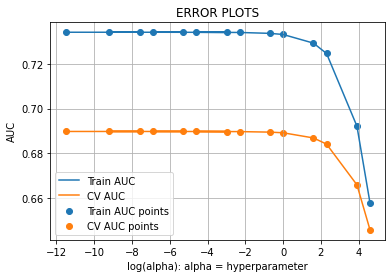

In [7]:
import seaborn as sns
from tqdm import tqdm
from sklearn.naive_bayes import MultinomialNB

train_auc_1 = [] ; cv_auc_1 = [] ; train_auc_50_1 = [] ; cv_auc_50_1 = []; train_auc_2 = [] ; cv_auc_2 = []
train_auc_50_2 = [] ; cv_auc_50_2 = []
alpha = [0.00001,0.0005, 0.0001,0.005,0.001,0.05,0.01,0.1,0.5,1,5,10,50,100]

for a in tqdm(alpha):
    # using data set 1 with BOW representation
    mul_nb_1 = MultinomialNB(alpha=a) # without using 50-50 class priors
    mul_nb_50_1 = MultinomialNB(alpha=a, class_prior = [0.5, 0.5] )
    mul_nb_1.fit(X_TRAIN_1, y_train) 
    mul_nb_50_1.fit(X_TRAIN_1, y_train)
    y_train_pred_1 = mul_nb_1.predict_proba(X_TRAIN_1)[:,1]
    y_cv_pred_1 = mul_nb_1.predict_proba(X_CV_1)[:,1]
    y_train_pred_50_1 = mul_nb_50_1.predict_proba(X_TRAIN_1)[:,1]
    y_cv_pred_50_1 = mul_nb_50_1.predict_proba(X_CV_1)[:,1]
#     y_train_pred = batch_predict(mul_nb, X_TRAIN_1)
#     y_cv_pred =batch_predict(mul_nb, X_CV_1)
    train_auc_1.append(roc_auc_score(y_train,y_train_pred_1))
    cv_auc_1.append(roc_auc_score(y_cv, y_cv_pred_1))
    train_auc_50_1.append(roc_auc_score(y_train,y_train_pred_50_1))
    cv_auc_50_1.append(roc_auc_score(y_cv, y_cv_pred_50_1))
    
    # using data set 2 with TF-IDF representation
    mul_nb_2 = MultinomialNB(alpha=a) # without using 50-50 class priors
    mul_nb_50_2 = MultinomialNB(alpha=a, class_prior = [0.5, 0.5] )
    mul_nb_2.fit(X_TRAIN_2, y_train) 
    mul_nb_50_2.fit(X_TRAIN_2, y_train)
    y_train_pred_2 = mul_nb_2.predict_proba(X_TRAIN_2)[:,1]
    y_cv_pred_2 = mul_nb_2.predict_proba(X_CV_2)[:,1]
    y_train_pred_50_2 = mul_nb_50_2.predict_proba(X_TRAIN_2)[:,1]
    y_cv_pred_50_2 = mul_nb_50_2.predict_proba(X_CV_2)[:,1]
    train_auc_2.append(roc_auc_score(y_train,y_train_pred_2))
    cv_auc_2.append(roc_auc_score(y_cv, y_cv_pred_2))
    train_auc_50_2.append(roc_auc_score(y_train,y_train_pred_50_2))
    cv_auc_50_2.append(roc_auc_score(y_cv, y_cv_pred_50_2))

plt.plot(np.log(alpha), train_auc_1, label='Train AUC')
plt.plot(np.log(alpha), cv_auc_1, label='CV AUC')

plt.scatter(np.log(alpha), train_auc_1, label='Train AUC points')
plt.scatter(np.log(alpha), cv_auc_1, label='CV AUC points')

plt.legend()
plt.xlabel('log(alpha): alpha = hyperparameter')
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()    

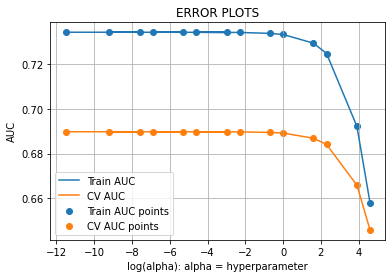

In [8]:
plt.plot(np.log(alpha), train_auc_50_1, label='Train AUC')
plt.plot(np.log(alpha), cv_auc_50_1, label='CV AUC')

plt.scatter(np.log(alpha), train_auc_50_1, label='Train AUC points')
plt.scatter(np.log(alpha), cv_auc_50_1, label='CV AUC points')

plt.legend()
plt.xlabel("log(alpha): alpha = hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()    

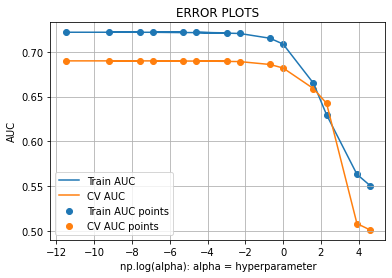

In [9]:
plt.plot(np.log(alpha), train_auc_2, label='Train AUC')
plt.plot(np.log(alpha), cv_auc_2, label='CV AUC')

plt.scatter(np.log(alpha), train_auc_2, label='Train AUC points')
plt.scatter(np.log(alpha), cv_auc_2, label='CV AUC points')

plt.legend()
plt.xlabel("np.log(alpha): alpha = hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show() 

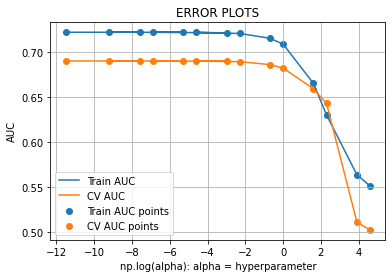

In [10]:
plt.plot(np.log(alpha), train_auc_50_2, label='Train AUC')
plt.plot(np.log(alpha), cv_auc_50_2, label='CV AUC')

plt.scatter(np.log(alpha), train_auc_50_2, label='Train AUC points')
plt.scatter(np.log(alpha), cv_auc_50_2, label='CV AUC points')

plt.legend()
plt.xlabel("np.log(alpha): alpha = hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show() 

# Predicting on test data

Set 1

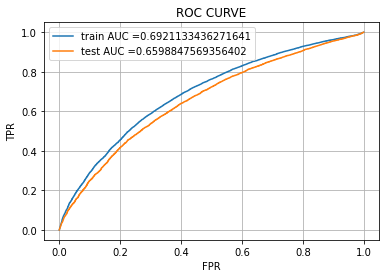

In [82]:
# for set1 , best alpha value is 50 
clf =  MultinomialNB(alpha=50)
clf.fit(X_TRAIN_1, y_train)

# log_probs
log_prob_neg =clf.feature_log_prob_[0]
log_prob_pos =clf.feature_log_prob_[1]

y_train_pred = clf.predict_proba(X_TRAIN_1)[:,1]
y_test_pred = clf.predict_proba(X_TEST_1)[:,1]

train_fpr, train_tpr, train_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, test_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC CURVE")
plt.grid()
plt.show()

Confusion Matrix

the maximum value of tpr*(1-fpr) 0.3845666833487831 for threshold 1.0


<AxesSubplot:>

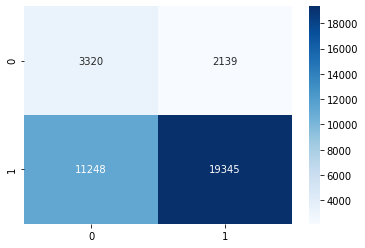

In [12]:
def find_best_threshold(threshold, fpr, tpr):
    t = threshold[np.argmax(tpr*(1-fpr))]
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshold):
    predictions = []
    for i in proba:
        if i>=threshold:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions

best_t = find_best_threshold(test_thresholds, test_fpr, test_tpr)
cm = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
sns.heatmap(cm, annot=True,fmt="d",cmap='Blues')

Set 2

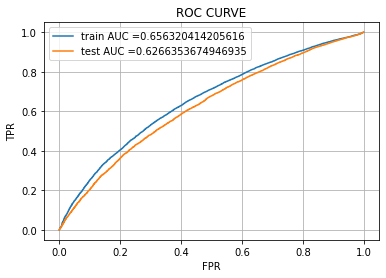

In [80]:
# for set2 , best alpha is 6
clf =  MultinomialNB(alpha=6)
clf.fit(X_TRAIN_2, y_train)

y_train_pred_2 = clf.predict_proba(X_TRAIN_2)[:,1]
y_test_pred_2 = clf.predict_proba(X_TEST_2)[:,1]

train_fpr_2, train_tpr_2, train_thresholds_2 = roc_curve(y_train, y_train_pred_2)
test_fpr_2, test_tpr_2, test_thresholds_2 = roc_curve(y_test, y_test_pred_2)

plt.plot(train_fpr_2, train_tpr_2, label="train AUC ="+str(auc(train_fpr_2, train_tpr_2)))
plt.plot(test_fpr_2, test_tpr_2, label="test AUC ="+str(auc(test_fpr_2, test_tpr_2)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ROC CURVE")
plt.grid()
plt.show()

the maximum value of tpr*(1-fpr) 0.35192742932673904 for threshold 0.943


<AxesSubplot:>

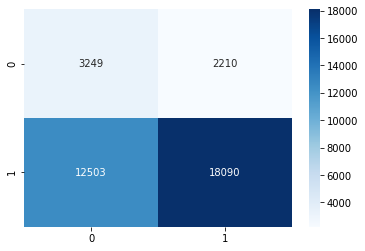

In [81]:
best_t = find_best_threshold(test_thresholds_2, test_fpr_2, test_tpr_2)
cm = confusion_matrix(y_test, predict_with_best_t(y_test_pred_2, best_t))
sns.heatmap(cm, annot=True,fmt="d",cmap='Blues')

#  Find top 20 features

In [15]:
# using set 1
arr_len_neg = len(log_prob_neg)
arr_len_pos = len(log_prob_pos)
top_20_prob_ind_neg = np.argsort(log_prob_neg)[:arr_len_neg-21:-1]
top_20_prob_ind_pos = np.argsort(log_prob_pos)[:arr_len_neg-21:-1]
# list of all feature names
non_essay_feats = ['price','teacher_number_of_previously_posted_projects', 'school_state', 'teacher_prefix', 'project_grade_category', 'clean_categories', 'clean_subcategories' ]
total_feat = feature_names_bow.copy()
total_feat.extend(non_essay_feats)

def return_feature_names(feat_ind_arr, total_feat_arr):
    features = []
    for ind in feat_ind_arr:
        features.append(total_feat_arr[ind])
    return features  

# top 20 negative features
print('Top 20 features in negative class = ', return_feature_names(top_20_prob_ind_neg, total_feat))

# top 20 positive features
print('Top 20 features in positive class = ', return_feature_names(top_20_prob_ind_pos, total_feat))

Top 20 features in negative class =  ['students', 'school', 'learning', 'my', 'classroom', 'not', 'learn', 'help', 'they', 'the', 'my students', 'price', 'nannan', 'many', 'we', 'need', 'work', 'come', 'teacher_number_of_previously_posted_projects', 'love']
Top 20 features in positive class =  ['students', 'school', 'my', 'learning', 'classroom', 'the', 'they', 'not', 'my students', 'learn', 'help', 'price', 'many', 'nannan', 'we', 'need', 'work', 'reading', 'use', 'teacher_number_of_previously_posted_projects']


<h1>3. Summary</h1>

<br> as mentioned in the step 5 of instructions

In [90]:
print('-'*76)
print('| {}  | {}   \t|  {}  |  {} \t\t   |'.format('Vectorizer', 'Model', 'Hyper Parameter', 'AUC'))
print('-'*76)
print('| {}  \t      | {}  |  {}  \t\t    |  {}  |'.format('BOW', 'Multinomial NB', 50, auc(test_fpr, test_tpr)))
print('-'*76)
print('| {}\t      | {}  |  {}  \t\t    |  {}  |'.format('TFIDF', 'Multinomial NB', 6, auc(test_fpr_2, test_tpr_2)))
print('-'*76)

----------------------------------------------------------------------------
| Vectorizer  | Model   	|  Hyper Parameter  |  AUC 		   |
----------------------------------------------------------------------------
| BOW  	      | Multinomial NB  |  50  		    |  0.6598847569356402  |
----------------------------------------------------------------------------
| TFIDF	      | Multinomial NB  |  6  		    |  0.6266353674946935  |
----------------------------------------------------------------------------
